In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile

FORECasT
Min: 0.000
Q1: 306.000
Median: 953.000
Q3: 1998.500
Max: 17625.000


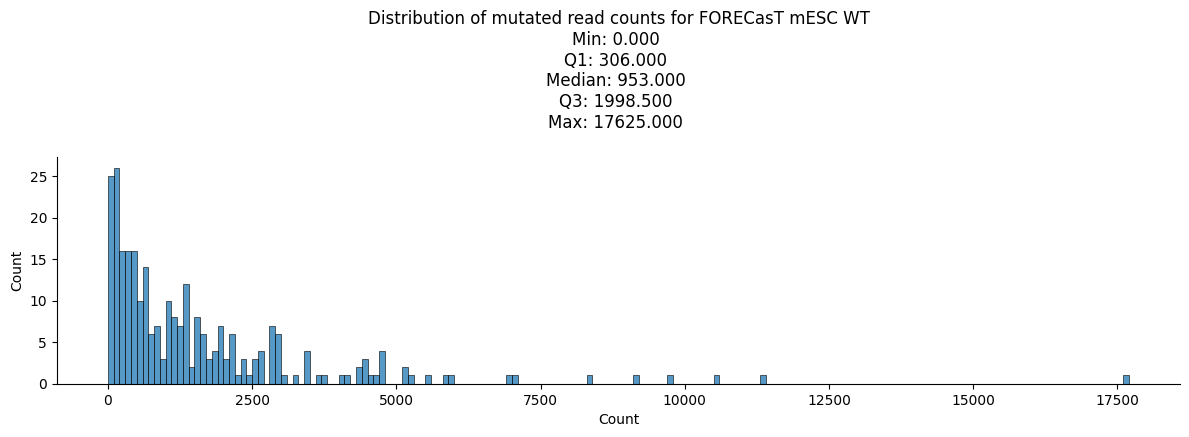

0105-mESC-Lib1-Cas9-Tol2-BioRep2-techrep1
Min: 103.000
Q1: 70450.500
Median: 143398.500
Q3: 271339.500
Max: 1270091.000


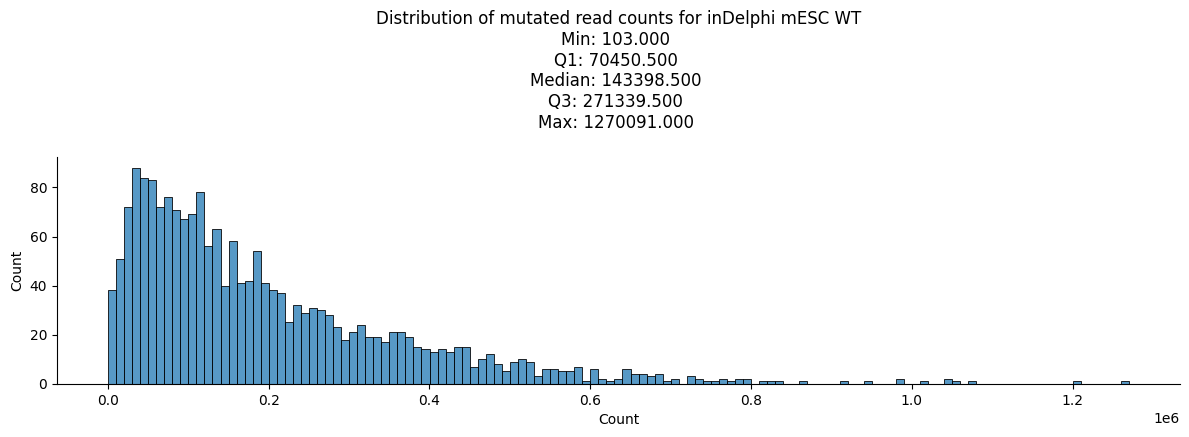

0226-PRLmESC-Lib1-Cas9
Min: 0.000
Q1: 59627.500
Median: 147337.500
Q3: 312534.250
Max: 2468786.000


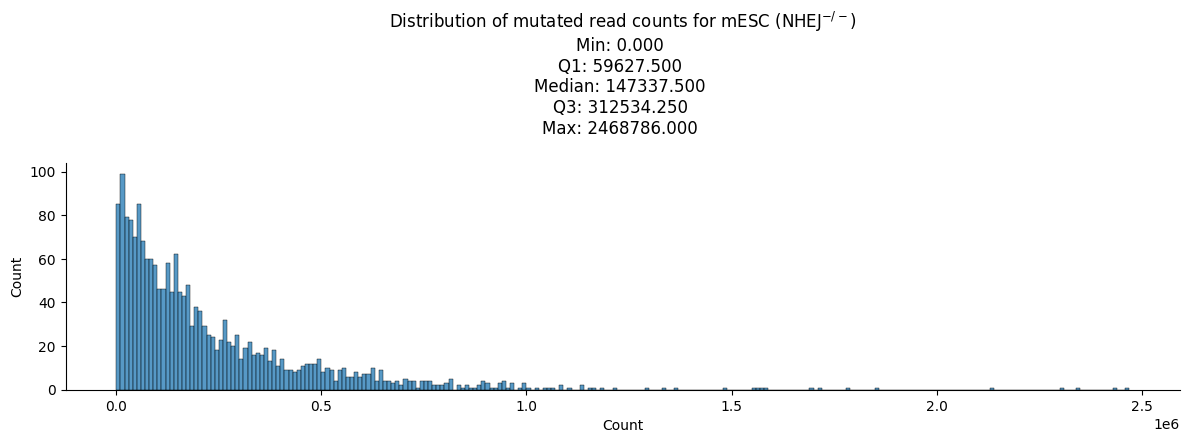

In [2]:
all_ds = ['FORECasT',
 '0105-mESC-Lib1-Cas9-Tol2-BioRep2-techrep1',
 '1027-mESC-Lib1-Cas9-Tol2-Biorep1-techrep1',
 '0226-PRLmESC-Lib1-Cas9',
 'TREX_A',
 'HAP1']

title_mapping = {
    'FORECasT': "FORECasT mESC WT",
    '0105-mESC-Lib1-Cas9-Tol2-BioRep2-techrep1': "inDelphi mESC WT",
    '1027-mESC-Lib1-Cas9-Tol2-Biorep1-techrep1': "inDelphi mESC WT",
    "052218-U2OS-+-LibA-postCas9-rep1": "U2OS",
    '0226-PRLmESC-Lib1-Cas9': 'mESC ($\it{\mathregular{NHEJ^{-/-}}}$)',
    'TREX_A': "TREX2",
    'HAP1': "mESC HAP1"
}

for d in all_ds:

    file_dir = os.environ["OUTPUT_DIR"] + "processed_data/Tijsterman_Analyser/{}/".format(d)

    if not os.path.exists(file_dir):
        continue

    all_f = os.listdir(file_dir)
    all_f = [f for f in all_f if ("tij.sorted" in f)]

    if len(all_f) == 0:
        continue

    df = []

    for f in all_f:
        target = f.split(".")[0]
        counts = pd.read_csv(file_dir + f, sep="\t")["countEvents"].sum()
        df.append((target, counts))

    df = pd.DataFrame(df, columns=["Target", "Count"])
    df.head()

    data = df["Count"]
    quartiles = percentile(data, [25, 50, 75])
    data_min, data_max = data.min(), data.max()

    print(d)
    print(f"Min: {data_min:.3f}")
    print('Q1: %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3: %.3f' % quartiles[2])
    print('Max: %.3f' % data_max)

    sns.displot(data=df, x="Count", aspect=4, height=3, binwidth=100 if d in ["FORECasT", "TREX_A", "HAP1"] else 10000)
    plt.title(f"Distribution of mutated read counts for {title_mapping[d]}\n" + 
        f"Min: {data_min:.3f} \n" + 
        f"Q1: {quartiles[0]:.3f} \n" + 
        f"Median: {quartiles[1]:.3f} \n" + 
        f"Q3: {quartiles[2]:.3f} \n" + 
        f"Max: {data_max:.3f} \n"       
    )
    plt.show()
    # plt.savefig(f"./artifacts/mutated_read_count_distributions_{d}.pdf")
plt.close()

Fraction
Type     Size          
DELETION 1     0.070059
         2     0.113569
         3     0.025074
         4     0.325959
         5     0.039086
         6     0.008850
         7     0.013274
         8     0.050147
         9     0.002212
         10    0.008112
         11    0.003687
         13    0.010324
         14    0.003687
         15    0.001475
         17    0.011799
         18    0.002950
         19    0.002212
         20    0.004425
         21    0.002212
         24    0.005900
         26    0.002950
         32    0.002950
         36    0.001475
         52    0.001475

In [ ]:
for d in all_ds:

    file_dir = os.environ["OUTPUT_DIR"] + "processed_data/Tijsterman_Analyser/{}/".format(d)

    if not os.path.exists(file_dir):
        continue

    all_f = os.listdir(file_dir)
    all_f = [f for f in all_f if ("tij.sorted" in f)]

    if len(all_f) == 0:
        continue

    df = []

    for f in all_f:
        target = f.split(".")[0]
        counts = pd.read_csv(file_dir + f, sep="\t")["countEvents"].sum()
        t = pd.read_csv(file_dir + f, sep="\t")
        total_counts = t["countEvents"].sum()
        t["Fraction"] = t["countEvents"]/total_counts
        t = t[t["Type"] == "DELETION"][["Type", "Size", "Fraction"]].groupby(["Type", "Size"]).sum(numeric_only=True)
        df.append(t)

    df = pd.concat(df).reset_index()
    fig, ax = plt.subplots(figsize=(15, 3))
    sns.barplot(data=df.groupby("Size").sum(numeric_only=True).div(len(all_f)).reset_index(), x="Size", y="Fraction", ax=ax)
    plt.title(f"Mean Deletion Length Frequency of Mapped Mutated Reads for\n{title_mapping[d]}")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(f"./artifacts/mapped_mutated_reads_deletion_length_frequencies_{d}.pdf", bbox_inches='tight')
plt.close()